In [2]:
!pip install gradio

In [3]:
!pip install ollama

In [6]:
pip show ollama

Name: ollama
Version: 0.4.7
Summary: The official Python client for Ollama.
Home-page: https://ollama.com
Author: Ollama
Author-email: hello@ollama.com
License: MIT
Location: c:\users\raman\anaconda3\envs\myenv\lib\site-packages
Requires: httpx, pydantic
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url=r'E:\FSDS&AI\titanic_ dataset_final.csv'
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
print('Missing values in the dataset')
print(df.isnull().sum())

Missing values in the dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


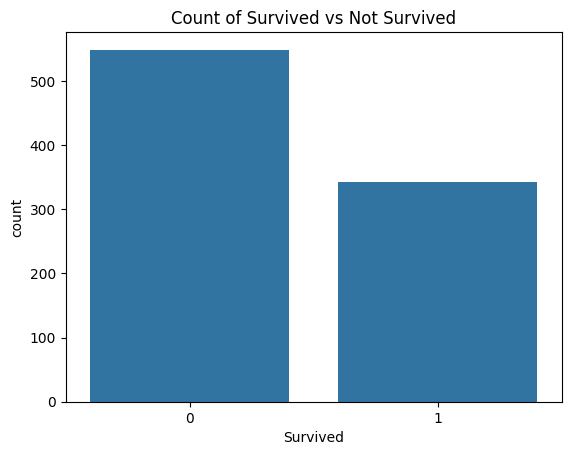

In [14]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs Not Survived')
plt.show()

In [16]:
import ollama
def generate_insights(def_summary):
    prompt=f'Analyze the dataset summary and provide insights:\n\n{def_summary}'
    response = ollama.chat(model='mistral',messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

summary = df.describe().to_string()
insights = generate_insights(summary)
print('\n Insights from the dataset:\n')
print(insights)


 Insights from the dataset:

 The provided dataset summary is from the Titanic data, a classic example in machine learning and data analysis. Here are some insights derived from the summary:

1. **Passenger Count**: There were 891 unique passengers on board the Titanic.

2. **Survived**: Out of these passengers, only about 38% (0.383838) survived the sinking of the ship.

3. **Pclass**: The highest number of passengers belonged to the Second class (Pclass=2), with approximately 614 passengers (2.308642). There were also 289 First-class passengers (Pclass=1) and 98 Steamship Company employees (Pclass=3).

4. **Age**: The average age of the passengers was around 29.7 years, but it spans a wide range from 0.42 to 80 years. Note that ages less than 16 were rounded up to 16.

5. **SibSp and Parch**: These variables represent the number of siblings (SibSp) and parents/guardians (Parch) aboard the ship with each passenger. On average, passengers had about half a sibling and a similar number 

In [17]:
import gradio as gr
def greet(name):
    return "Hello " + name + "!"
demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://11d33854d13f3d2aa8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Gradio Interface
import gradio as gr
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visualizations")],
    title="📊 LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload any dataset CSV file and get automated EDA insights with AI-powered analysis and visualizations."
)

# Launch the Gradio App
demo.launch(share=True)